In [1]:
#!/usr/bin/env python3
import os,sys,re
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#======== ESTIMATE ERROR FROM CORRELATED DATA
def estimateError (timeSeries, numBlocks=10):
  timeSeries = np.array (timeSeries)
  n = timeSeries.size
  if (n < numBlocks*2):
    return "NOT ENOUGH DATA POINTS TO PARTITION INTO numBlocks BLOCKS!"
  blocks = np.split(timeSeries, np.floor(np.arange(n/numBlocks,n,n/numBlocks)).astype(int))
  blockVars = []
  for block in blocks:
    blockMean = np.mean (block)
    blockVar = np.var (block, ddof=1)
    blockVars += [blockVar]
  meanBlockVar = np.mean (blockVars)
  return np.sqrt(meanBlockVar/numBlocks)

In [30]:
#======== READ MONTE CARLO PARAMETERS AND TRAJECTORIES FROM DATA DIRECTORIES
codeDir = os.getcwd()
dataDirList = sorted ( os.listdir("DATA") )
data = np.empty ([0,5])       # prepare to add stats lines of 5 elements each
for dataDir in dataDirList:
  dataPath = "DATA/" + dataDir

  #-------- READ PARAMETERS h, xmax, ymax
  with open(dataPath + "/pars.dat") as f:
    s = f.read()
  match = re.search ('field\s*=\s*(.*)', s); h = float (match.group(1))
  match = re.search ('xmax\s*=\s*(.*)', s);  xmax = float (match.group(1))
  match = re.search ('ymax\s*=\s*(.*)', s);  ymax = float (match.group(1))
  
  #-------- READ TRAJECTORIES M(t), U(t)
  trajs = np.loadtxt(dataPath + "/history.dat")
  M = trajs[5000:,0]   # discard first 1000 MCS
  Mavg = np.mean(M).item() / (xmax*ymax)
  Merr = estimateError (M) / (xmax*ymax)
  
  U = trajs[5000:,1]
  Uavg = np.mean(U).item() / (xmax*ymax)
  Uerr = estimateError (U) / (xmax*ymax)
  
  print ("dataDir={:8s}  h={:8g}   Mavg={:8.4f}   Merr={:8.4f}".
          format (dataDir, h, Mavg, Merr, Uavg, Uerr))

  data = np.append (data, [[h, Mavg, Merr, Uavg, Uerr]], axis=0)

print ("data.shape = ", data.shape)
[h,Mavg,Merr,Uavg,Uerr] = np.transpose(data)

dataDir=h0.0001   h=  0.0001   Mavg=  0.0757   Merr=  0.1938
dataDir=h0.0002   h=  0.0002   Mavg=  0.1352   Merr=  0.1923
dataDir=h0.0003   h=  0.0003   Mavg=  0.2073   Merr=  0.1883
dataDir=h0.0004   h=  0.0004   Mavg=  0.2650   Merr=  0.1815
dataDir=h0.0005   h=  0.0005   Mavg=  0.3193   Merr=  0.1717
dataDir=h0.0006   h=  0.0006   Mavg=  0.3875   Merr=  0.1593
dataDir=h0.0007   h=  0.0007   Mavg=  0.4263   Merr=  0.1469
dataDir=h0.0008   h=  0.0008   Mavg=  0.4417   Merr=  0.1451
dataDir=h0.0009   h=  0.0009   Mavg=  0.4828   Merr=  0.1309
dataDir=h0.001    h=   0.001   Mavg=  0.5190   Merr=  0.1242
dataDir=h0.002    h=   0.002   Mavg=  0.6450   Merr=  0.0562
dataDir=h0.003    h=   0.003   Mavg=  0.6779   Merr=  0.0346
dataDir=h0.004    h=   0.004   Mavg=  0.6918   Merr=  0.0267
dataDir=h0.005    h=   0.005   Mavg=  0.7050   Merr=  0.0221
dataDir=h0.006    h=   0.006   Mavg=  0.7127   Merr=  0.0213
dataDir=h0.007    h=   0.007   Mavg=  0.7162   Merr=  0.0199
dataDir=h0.008    h=   0

Text(0.5, 1.0, 'M(h) and U(h) for 2D Ising model at Tc')

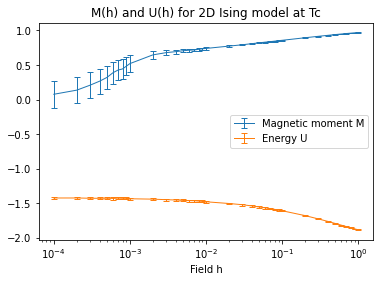

In [33]:
#======== PLOT DATA
plt.errorbar (h,Mavg,Merr,linewidth=1,capsize=3,label="Magnetic moment M")
plt.errorbar (h,Uavg,Uerr,linewidth=1,capsize=3,label="Energy U")
plt.xscale("log")
plt.xlabel("Field h")
plt.legend(loc="center right")  